<a href="https://colab.research.google.com/github/sanyhmahadi/StudentCarrerSubjectChosicePreference/blob/main/mycardial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#url = '/content/drive/MyDrive/Myocardial infarction/myocardial.csv'
#url = '/content/drive/MyDrive/Myocardial infarction/myocardial_imp.csv'
#df = pd.read_csv(url)
df = pd.read_excel('/content/drive/MyDrive/Research/ML/Others Data/StudentSubjectChoose.xlsx')
df.head()


,pref_group,roll_class8,hobby,fav_indoor_game,play_time_class8,study_time_class8,ans_method,fav_subj_class8,co_curricular,attendence_class8,feared_subj_class8,group
0,science,2021-11-20 00:00:00,collecting_things,carom,2021-02-03 00:00:00,2021-04-06 00:00:00,making_answers_on_your_own_knowledge,science,science_club,60-80\%',math,science
1,science,2021-01-10 00:00:00,reading_books,ludo,2021-02-03 00:00:00,2021-04-06 00:00:00,memorising_answers,bengali/english,science_club,80\%',math,science
2,commerce,21-30,drawing,carom,above,2021-06-08 00:00:00,memorising_answers,bengali/english,others,80\%',math,science
3,science,21-30,drawing,carom,2021-01-02 00:00:00,2021-06-08 00:00:00,making_answers_on_your_own_knowledge,math,science_club,80\%',math,science
4,science,2021-01-10 00:00:00,drawing,ludo,2021-01-02 00:00:00,2021-02-04 00:00:00,making_answers_on_your_own_knowledge,math,cultural_club,80\%',science,science


In [ ]:
X = df.drop(['Class'], axis='columns')
X.head()

,Age,Hypertension,Diabetes,Cholesterol,Chest_Pain_Location,Chest_Pain_Mark
0,23,0,0,0,1,0
1,23,0,0,0,1,0
2,24,1,0,0,3,0
3,23,1,1,1,0,1
4,22,0,0,0,3,1


In [ ]:
y = df.Class

In [ ]:
#FEATURE IMPORTANCE SCORE USING EXTRA TREES ALGORITHM

# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 100,
                                        criterion ='entropy', random_state=1 )
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
# Plotting a Bar Graph to compare the models

fig = plt.figure(figsize=(5,6)) 
#plt.bar(X.columns, feature_importance_normalized)
plt.barh(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(len(X_train))
print(len(X_test))

193
84


In [ ]:
model = SVC(kernel='linear')

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model = GaussianNB()

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
#model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)

In [ ]:
#Adaboost with different base Classifiers
#model = AdaBoostClassifier(SVC(kernel='linear'),n_estimators=100,learning_rate=1.0, algorithm='SAMME')
#model = AdaBoostClassifier(RandomForestClassifier(n_estimators=100, random_state=1),n_estimators=100,learning_rate=1.0, algorithm='SAMME')
model = AdaBoostClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=100,learning_rate=1.0, algorithm='SAMME')
#model = AdaBoostClassifier(GaussianNB(),n_estimators=100,learning_rate=1.0, algorithm='SAMME')
#model = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100,learning_rate=1.0, algorithm='SAMME')

In [ ]:
#Bagging with different base Classifiers
# Instantiate dt
#dt = SVC(kernel='linear')
#dt = KNeighborsClassifier(n_neighbors=5)
#dt = GaussianNB()
#dt = DecisionTreeClassifier(random_state=1)
#dt = RandomForestClassifier(n_estimators=100, random_state=1)

# Instantiate model
model = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=1)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0
 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0
 1 1 1 0 0 1 1 1 0 1]


In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_test, predictions)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)

Confusion Matrix
[[43  6]
 [ 3 32]]
Test Set: 84
Accuracy = 89.28571428571429 %
Precision: 0.842105
Recall: 0.914286
F1 score: 0.876712
Cohens kappa: 0.782258
ROC AUC: 0.895918


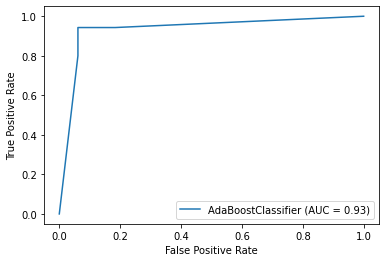

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)  
plt.show()  

Confusion matrix, without normalization
[[39  6]
 [ 6 33]]
Normalized confusion matrix
[[0.86666667 0.13333333]
 [0.15384615 0.84615385]]


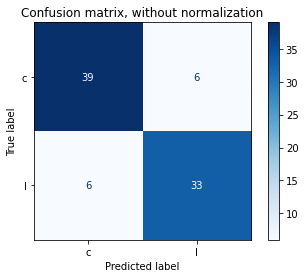

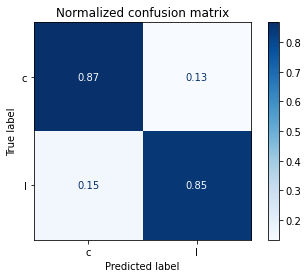

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels='class',
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

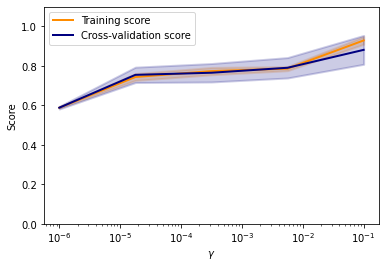

In [ ]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()